In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

#### Importing 3 data Sets

In [3]:
# Creating columns
rating = ['UserID','MovieID','Rating','Timestamp']
user = ['UserID','Gender','Age','Occupation','Zip-code']
movie = ['MovieID','Title','Genres']


In [4]:
#importig ratings dataset
rating_df = pd.read_csv('ratings.dat',header=None,delimiter='::',names=rating)
print(rating_df.head())
print()
print(rating_df.shape)



C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

(1000209, 4)


In [5]:
#importig user dataset
user_df = pd.read_csv('users.dat',header=None,delimiter='::',names=user)
print(user_df.head())
print()
print(user_df.shape)



   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

(6040, 5)


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [6]:
#importig movie dataset
movie_df = pd.read_csv('movies.dat',header=None,delimiter='::',names=movie)
print(movie_df.head())
print()
print(movie_df.shape)



   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

(3883, 3)


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


#### Merging all 3 datasets

In [7]:
#Merge all 3 datasets in one

df = rating_df.merge(user_df,how='outer',on='UserID')
df = df.merge(movie_df,how='outer',on='MovieID')
print(df.head())
print()
print(df.shape)


   UserID  MovieID  Rating    Timestamp Gender   Age  Occupation Zip-code  \
0     1.0     1193     5.0  978300760.0      F   1.0        10.0    48067   
1     2.0     1193     5.0  978298413.0      M  56.0        16.0    70072   
2    12.0     1193     4.0  978220179.0      M  25.0        12.0    32793   
3    15.0     1193     4.0  978199279.0      M  25.0         7.0    22903   
4    17.0     1193     5.0  978158471.0      M  50.0         1.0    95350   

                                    Title Genres  
0  One Flew Over the Cuckoo's Nest (1975)  Drama  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama  
3  One Flew Over the Cuckoo's Nest (1975)  Drama  
4  One Flew Over the Cuckoo's Nest (1975)  Drama  

(1000386, 10)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   UserID      1000209 non-null  float64
 1   MovieID     1000386 non-null  int64  
 2   Rating      1000209 non-null  float64
 3   Timestamp   1000209 non-null  float64
 4   Gender      1000209 non-null  object 
 5   Age         1000209 non-null  float64
 6   Occupation  1000209 non-null  float64
 7   Zip-code    1000209 non-null  object 
 8   Title       1000386 non-null  object 
 9   Genres      1000386 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 84.0+ MB


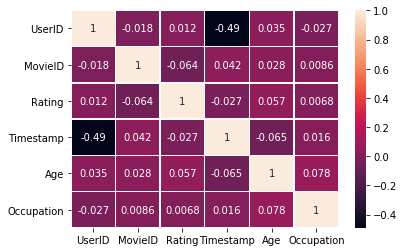

In [9]:
corr = df.corr()
sns.heatmap(corr,annot= True,linewidths=0.5)

In [10]:
df.isnull().sum()

UserID        177
MovieID         0
Rating        177
Timestamp     177
Gender        177
Age           177
Occupation    177
Zip-code      177
Title           0
Genres          0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(1000209, 10)

In [13]:
df.Age.unique()

array([ 1., 56., 25., 50., 18., 45., 35.])

In [24]:
print(df.Title.unique())

["One Flew Over the Cuckoo's Nest (1975)"
 'James and the Giant Peach (1996)' 'My Fair Lady (1964)' ...
 'White Boys (1999)' 'One Little Indian (1973)'
 'Five Wives, Three Secretaries and Me (1998)']


In [14]:
df.Rating.unique()

array([5., 4., 3., 2., 1.])

In [15]:
df.Occupation.unique()

array([10., 16., 12.,  7.,  1.,  3.,  4.,  8., 17.,  0.,  2.,  9., 19.,
       18., 15., 11., 20., 13.,  5., 14.,  6.])

In [20]:
df.MovieID.nunique()

3706

### User Age Distribution

Text(0.5, 1.0, 'Frequency Distribution of Age')

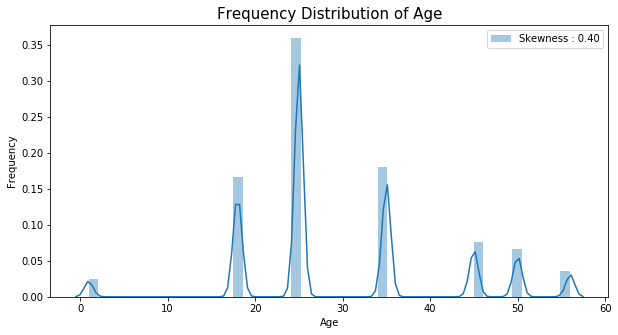

In [21]:
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    ax = sns.distplot(df['Age'], label="Skewness : %.2f"%(df['Age'].skew()))
    ax.set_xlabel('Age')
    ax.set_ylabel("Frequency")
    ax.legend(loc='best')
    ax.set_title('Frequency Distribution of {}'.format('Age'), fontsize = 15)

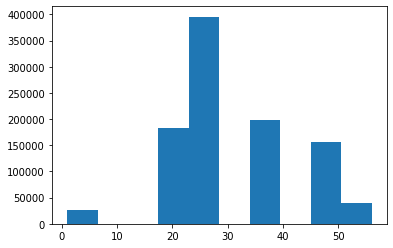

In [22]:
df.Age.hist(grid=False)

#### User rating of the movie “Toy Story”

In [33]:
df_toyStory = df.loc[df['Title'].str.contains('Toy Story')]

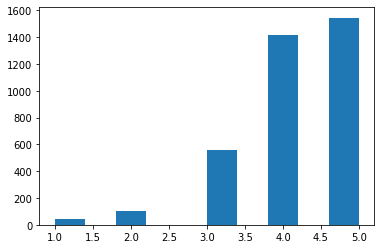

In [34]:
df_toyStory.Rating.hist(grid=False)

#### Top 25 movies by viewership rating

In [35]:
top_25 = df.groupby(["MovieID", "Title"]).Timestamp.count().sort_values(ascending=False)
top_25[:25]

MovieID  Title                                                
2858     American Beauty (1999)                                   3428
260      Star Wars: Episode IV - A New Hope (1977)                2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)        2883
480      Jurassic Park (1993)                                     2672
2028     Saving Private Ryan (1998)                               2653
589      Terminator 2: Judgment Day (1991)                        2649
2571     Matrix, The (1999)                                       2590
1270     Back to the Future (1985)                                2583
593      Silence of the Lambs, The (1991)                         2578
1580     Men in Black (1997)                                      2538
1198     Raiders of the Lost Ark (1981)                           2514
608      Fargo (1996)                                             2513
2762     Sixth

#### Ratings for all the movies reviewed by for a particular user of user id = 2696

In [36]:
usr_2696 = df.loc[df.UserID==2696, "Rating"].sort_values(ascending=False)
usr_2696.head(),usr_2696.shape

(250014    5.0
 603189    4.0
 371178    4.0
 689379    4.0
 618708    4.0
 Name: Rating, dtype: float64,
 (20,))

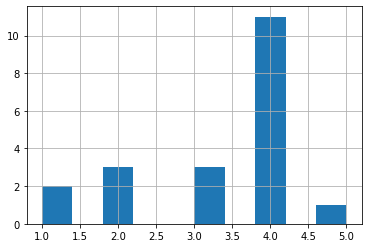

In [38]:
usr_2696.hist()

In [39]:
df.Genres.unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [40]:
Genres_list = df.Genres.tolist()
genre_list = []
i = 0
while(i<len(Genres_list)):
    genre_list+= Genres_list[i].split('|')
    i+=1

In [41]:
unique_gen = list(set(genre_list))
print(unique_gen)
print()
print("Length of the unique Genre : ",len(unique_gen))

['Animation', 'War', 'Fantasy', 'Action', 'Horror', 'Crime', 'Documentary', 'Comedy', 'Sci-Fi', 'Western', 'Thriller', "Children's", 'Romance', 'Mystery', 'Film-Noir', 'Drama', 'Adventure', 'Musical']

Length of the unique Genre :  18


#### Creating new genre columns for each category(genre) using encodig (1/0)

In [42]:
new_data = pd.concat([df,df.Genres.str.get_dummies()], axis=1)
print(new_data.columns)

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip-code', 'Title', 'Genres', 'Action', 'Adventure',
       'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


In [44]:
new_data.head(20)

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
5,18.0,1193,4.0,978156168.0,F,18.0,3.0,95825,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
6,19.0,1193,5.0,982730936.0,M,1.0,10.0,48073,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
7,24.0,1193,5.0,978136709.0,F,25.0,7.0,10023,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
8,28.0,1193,3.0,978125194.0,F,25.0,1.0,14607,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
9,33.0,1193,5.0,978557765.0,M,45.0,3.0,55421,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_new = new_data.drop(['Title','Zip-code','Timestamp','Genres'],axis=1)
df_new.head()

,UserID,MovieID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,F,1.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,M,56.0,16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,M,25.0,12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,M,25.0,7.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,M,50.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
print(df_new.columns)

Index(['UserID', 'MovieID', 'Rating', 'Gender', 'Age', 'Occupation', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')


#### Gender Encoding

In [48]:
df_new.Gender = pd.get_dummies(df_new.Gender)

##### Get X  and Y --Here X is all independets and  Y is Target.
###### X- All columns except unique values and Target column(Rating)
###### Y -is Rating - Target

In [49]:
x = df_new.drop(['UserID','MovieID','Rating'],axis=1)
x.shape

(1000209, 21)

In [50]:
y = df_new.Rating
y.shape

(1000209,)

In [51]:
x.Occupation.value_counts()

4.0     131032
0.0     130499
7.0     105425
1.0      85351
17.0     72816
20.0     60397
12.0     57214
2.0      50068
14.0     49109
16.0     46021
6.0      37205
3.0      31623
10.0     23290
15.0     22951
5.0      21850
11.0     20563
19.0     14904
13.0     13754
18.0     12086
9.0      11345
8.0       2706
Name: Occupation, dtype: int64

In [52]:
x = x.join(pd.get_dummies(x.Occupation,prefix='Occupation'))
x.head(),x.columns

(   Gender   Age  Occupation  Action  Adventure  Animation  Children's  Comedy  \
 0       1   1.0        10.0       0          0          0           0       0   
 1       0  56.0        16.0       0          0          0           0       0   
 2       0  25.0        12.0       0          0          0           0       0   
 3       0  25.0         7.0       0          0          0           0       0   
 4       0  50.0         1.0       0          0          0           0       0   
 
    Crime  Documentary  ...  Occupation_11.0  Occupation_12.0  Occupation_13.0  \
 0      0            0  ...                0                0                0   
 1      0            0  ...                0                0                0   
 2      0            0  ...                0                1                0   
 3      0            0  ...                0                0                0   
 4      0            0  ...                0                0                0   
 
    Occupati

In [53]:
x = x.drop(['Occupation','Occupation_0.0'],axis=1)
x.head(3),x.shape

(   Gender   Age  Action  Adventure  Animation  Children's  Comedy  Crime  \
 0       1   1.0       0          0          0           0       0      0   
 1       0  56.0       0          0          0           0       0      0   
 2       0  25.0       0          0          0           0       0      0   
 
    Documentary  Drama  ...  Occupation_11.0  Occupation_12.0  Occupation_13.0  \
 0            0      1  ...                0                0                0   
 1            0      1  ...                0                0                0   
 2            0      1  ...                0                1                0   
 
    Occupation_14.0  Occupation_15.0  Occupation_16.0  Occupation_17.0  \
 0                0                0                0                0   
 1                0                0                1                0   
 2                0                0                0                0   
 
    Occupation_18.0  Occupation_19.0  Occupation_20.0  
 0    

#### Split the data using SKLearn 

In [59]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.20, random_state = 5)

In [61]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 5)
classifier.fit(xtrain, ytrain)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = classifier.predict(xtest)

In [63]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[    0     0  1566  9592   194]
 [    0     0  2299 18710   491]
 [    0     0  4454 46116  1758]
 [    0     0  4554 61622  3289]
 [    0     0  2435 39497  3465]]


In [64]:
#Performance measure – Accuracy
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.3476319972805711
